<a href="https://colab.research.google.com/github/MarvDaParndAndy/MAT-421-Material/blob/main/MAT_421_Project_Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Introduction: The plan of this project is to take the data set from the cdc for weekly provisional counts of death from 2020 to 2023 in the United states. We will use the week count as the independent variable from the data set and the death where covid was the underlying cause, these variables in the data set are listed as: MMWR week as the x variable and COVID-19 (U071, Underlying Cause of Death) as the y. 





In [10]:
# importing module
from pandas import *
 
# reading CSV file
data = read_csv(".csv")


# converting column data to list
x = data[''].tolist()
y = data[''].tolist()

#print list data
print('', x)
print('  ', y)

MMWR Week:   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4

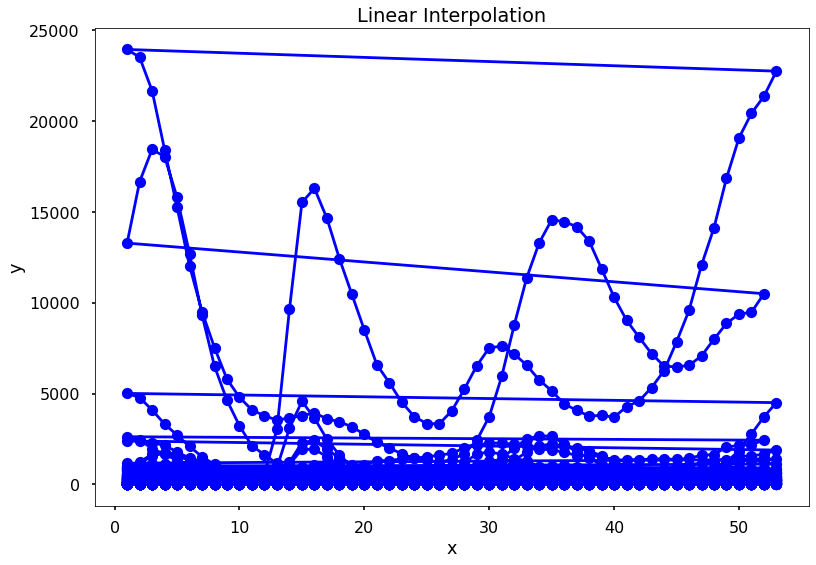

In [12]:
#Linear Interpolation
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")

f = interp1d(x, y)
print(f)
plt.plot(x,y, "ob-")
plt.title("Linear Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
#Cubic Spline Interpolation
from scipy.interpolate import CubicSpline
import numpy as np 

plt.style.use("seaborn-poster")
 
#Adding constraints
f = CubicSpline(x, y, bc_type = "natural")
x_new = np.linspace(0,25,100)
y_new = f(x_new)

#plot
plt.plot(x_new, y_new, "ro")
plt.title("cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.show

In [ ]:
#Lagrange Interpolation
import numpy.polynomial.polynomial as poly
from scipy.interpolate import lagrange
x_new = np.arange(0, 50, 0.1)
f = lagrange(x,y)
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#Newton Polynomial Interpolation 
%matplotlib inline

def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])
  coef[:,0] = y
  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1])/(x[i+j] - x[i])
  return coef 

def newton_poly(coef, x_data, x):
  n = len(x_data)-1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x - x_data[n-k])*p
  return p

a_s = divided_diff(x, y) [0, :]
x_new = np.arange(-5,2.1,0.1)
y_new = newton_poly(a_s,x,x_new)

plt.plot(x,y,'bo')
plt.plot(x_new,y_new)

In [ ]:
#Linear Regression: 
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)